# Goal

The idea of this notebook is to see how much importance should be given to the channel when training. The ground truth is that the channel has probably a huge influence on the number of views of a given video. Yet if the test set uses different channels, then it's useless to attribute too much importance to channel when training because it won't have learned the average viewing statistics for the new channels.

In [2]:
import pandas as pd

# Load the train and test datasets
train_data_path = "../dataset/train_val.csv"
test_data_path = "../dataset/test.csv"

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Extract the unique channels from each dataset
train_channels = set(train_data['channel'].unique())
test_channels = set(test_data['channel'].unique())

# Compare the channels
if train_channels == test_channels:
    print("The channels in the train and test datasets are the same.")
else:
    print("The channels in the train and test datasets are different.")
    print("Channels in train but not in test:", train_channels - test_channels)
    print("Channels in test but not in train:", test_channels - train_channels)
    

    # Calculate the proportion of channels from the test set that are present in the train set
    common_channels = test_channels.intersection(train_channels)
    proportion = len(common_channels) / len(test_channels) if test_channels else 0
    print(f"Proportion of test channels present in train set: {proportion:.2%}")

The channels in the train and test datasets are different.
Channels in train but not in test: {'UCN9-Y2E0_fLxtcWAgr89CsQ', 'UC8P49XCWzrcRVF1kct7BneA', 'UCyp-EzJrdTOd9uNPvmdst-w', 'UCpJ6Dn01AqjvFVN2EiK72Ag', 'UCFhLnzPQFjTtlUuf39emMfg', 'UCWnTC8o8AycL6a2eRrKSdBg', 'UCCykQNoqyABmoa3ZoaU93XA', 'UCpa2QppVwCuivaWe5qfVY_Q', 'UC-vrN89jIox3XqAKbEMeFgQ'}
Channels in test but not in train: set()
Proportion of test channels present in train set: 100.00%


Okay, so all the channels in the test are in the training data. Let's compare the standard deviation of views overall, and the average standard deviation of views when grouping by channel.

Overall standard deviation of views: 3793133.69
Mean standard deviation across channels: 1548906.22
Median standard deviation across channels: 383768.91
Min standard deviation across channels: 1819.12
Max standard deviation across channels: 16475547.47


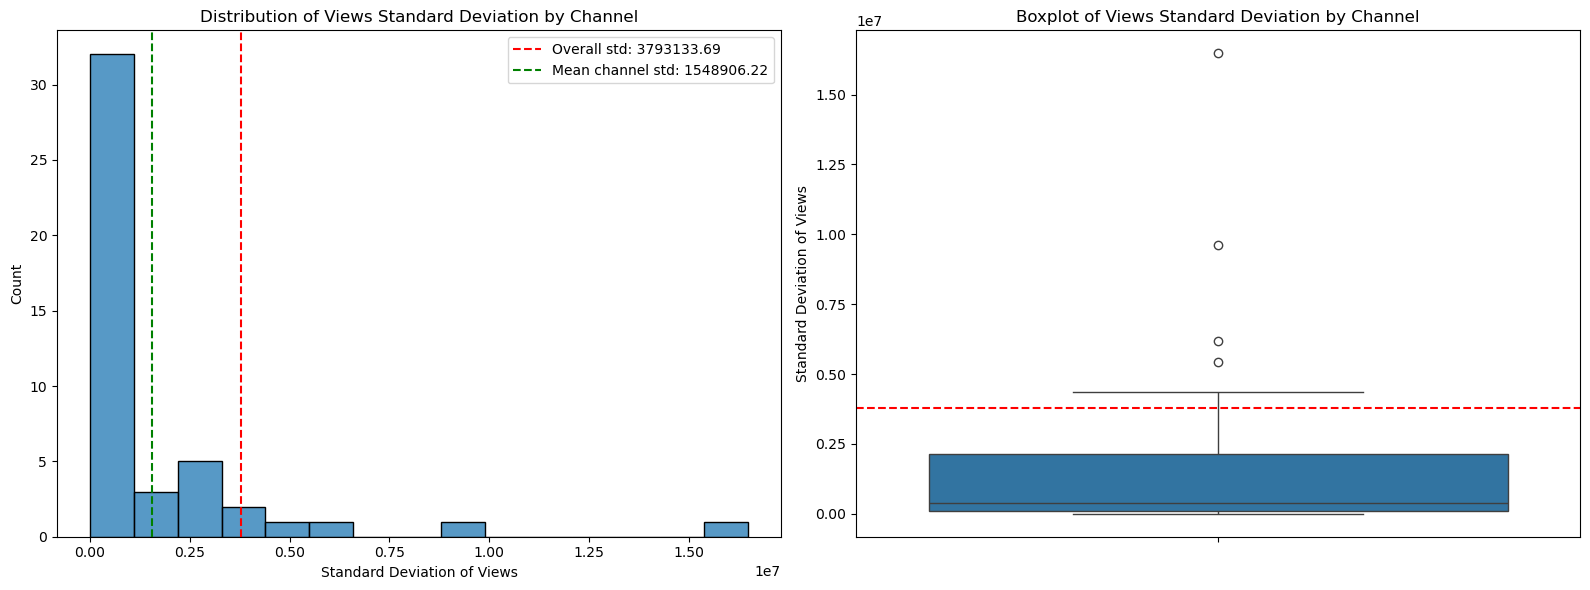

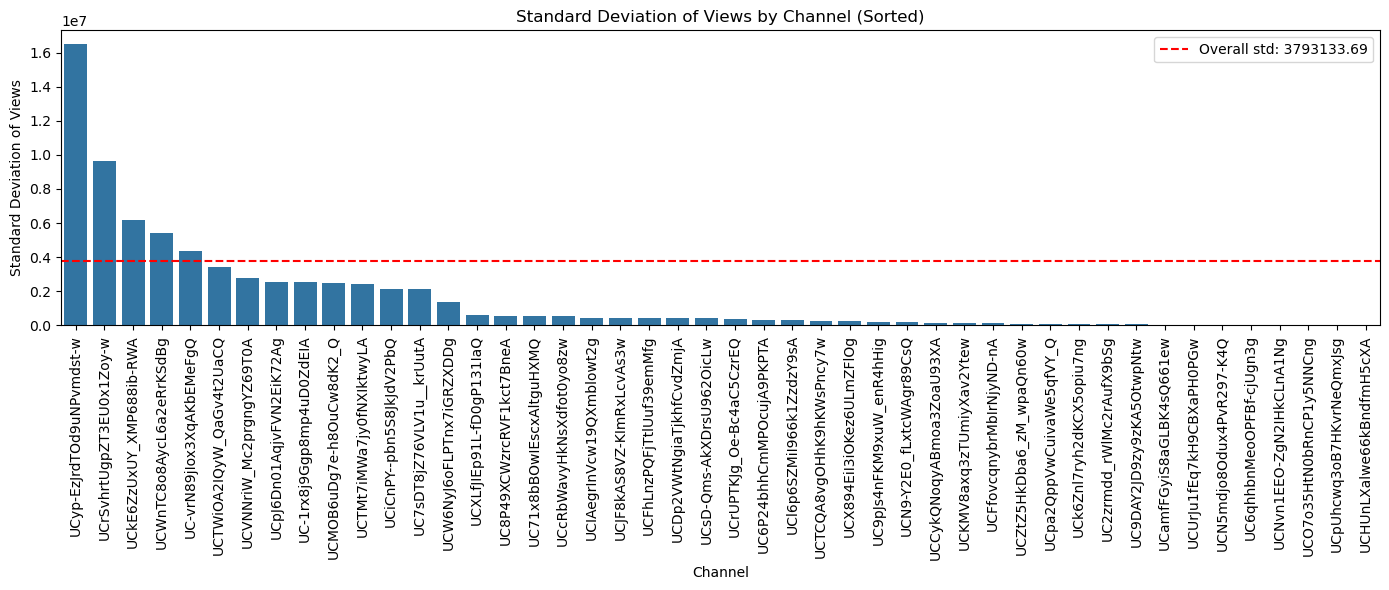

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate overall standard deviation of views
overall_std = train_data['views'].std()

# Calculate standard deviation of views for each channel
channel_std = train_data.groupby('channel')['views'].std().dropna()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of standard deviations per channel
sns.histplot(np.array(channel_std), ax=ax1)
ax1.axvline(overall_std, color='red', linestyle='--', 
            label=f'Overall std: {overall_std:.2f}')
ax1.axvline(channel_std.mean(), color='green', linestyle='--', 
            label=f'Mean channel std: {channel_std.mean():.2f}')
ax1.set_title('Distribution of Views Standard Deviation by Channel')
ax1.set_xlabel('Standard Deviation of Views')
ax1.set_ylabel('Count')
ax1.legend()

# Plot 2: Boxplot of standard deviations per channel
sns.boxplot(y=channel_std, ax=ax2)
ax2.set_title('Boxplot of Views Standard Deviation by Channel')
ax2.set_ylabel('Standard Deviation of Views')
ax2.axhline(overall_std, color='red', linestyle='--',
            label=f'Overall std: {overall_std:.2f}')

# Print some statistics
print(f"Overall standard deviation of views: {overall_std:.2f}")
print(f"Mean standard deviation across channels: {channel_std.mean():.2f}")
print(f"Median standard deviation across channels: {channel_std.median():.2f}")
print(f"Min standard deviation across channels: {channel_std.min():.2f}")
print(f"Max standard deviation across channels: {channel_std.max():.2f}")

plt.tight_layout()
plt.show()

# Additional plot to visualize the std dev for each channel (sorted)
plt.figure(figsize=(14, 6))
sorted_std = channel_std.sort_values(ascending=False)
sns.barplot(x=sorted_std.index, y=sorted_std.values)
plt.axhline(overall_std, color='red', linestyle='--', 
           label=f'Overall std: {overall_std:.2f}')
plt.title('Standard Deviation of Views by Channel (Sorted)')
plt.xticks(rotation=90)
plt.xlabel('Channel')
plt.ylabel('Standard Deviation of Views')
plt.legend()
plt.tight_layout()
plt.show()

So a large proportion of channels have an relatively low standard deviation -> that means that the channel is a strong base indicator for view count (GOOD NEWS).

there are 46 channels btw